In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\HADIJAT OJO\Documents\kaggle\healthcare_dataset.csv")

df.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive


In [4]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [5]:
#replacing the space in the column names with "_"
df.columns = df.columns.str.replace(' ', '_')

df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
#converting the Date_of_Admission and Discharge_Date columns to a datetime data type
df["Date_of_Admission"] = pd.to_datetime(df["Date_of_Admission"])

df["Discharge_Date"] = pd.to_datetime(df["Discharge_Date"])

In [7]:
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood_Type                    object
Medical_Condition             object
Date_of_Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance_Provider            object
Billing_Amount               float64
Room_Number                    int64
Admission_Type                object
Discharge_Date        datetime64[ns]
Medication                    object
Test_Results                  object
dtype: object

In [8]:
# adding a Days_Spent column to the dataframe
df["Days_Spent"] = (df["Discharge_Date"] - df["Date_of_Admission"]).dt.days

In [9]:
df.head(2)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Days_Spent
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6


# Exploratory Data Analysis

In [10]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition',
       'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider',
       'Billing_Amount', 'Room_Number', 'Admission_Type', 'Discharge_Date',
       'Medication', 'Test_Results', 'Days_Spent'],
      dtype='object')

In [11]:
columns = ['Gender', 'Blood_Type', 'Medical_Condition', 'Insurance_Provider', 'Admission_Type', 'Medication', 'Test_Results']

for i, column in enumerate(columns):
    print(df[column].value_counts())
    print("\n")

Gender
Male      27774
Female    27726
Name: count, dtype: int64


Blood_Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64


Medical_Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


Insurance_Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


Admission_Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64


Test_Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64




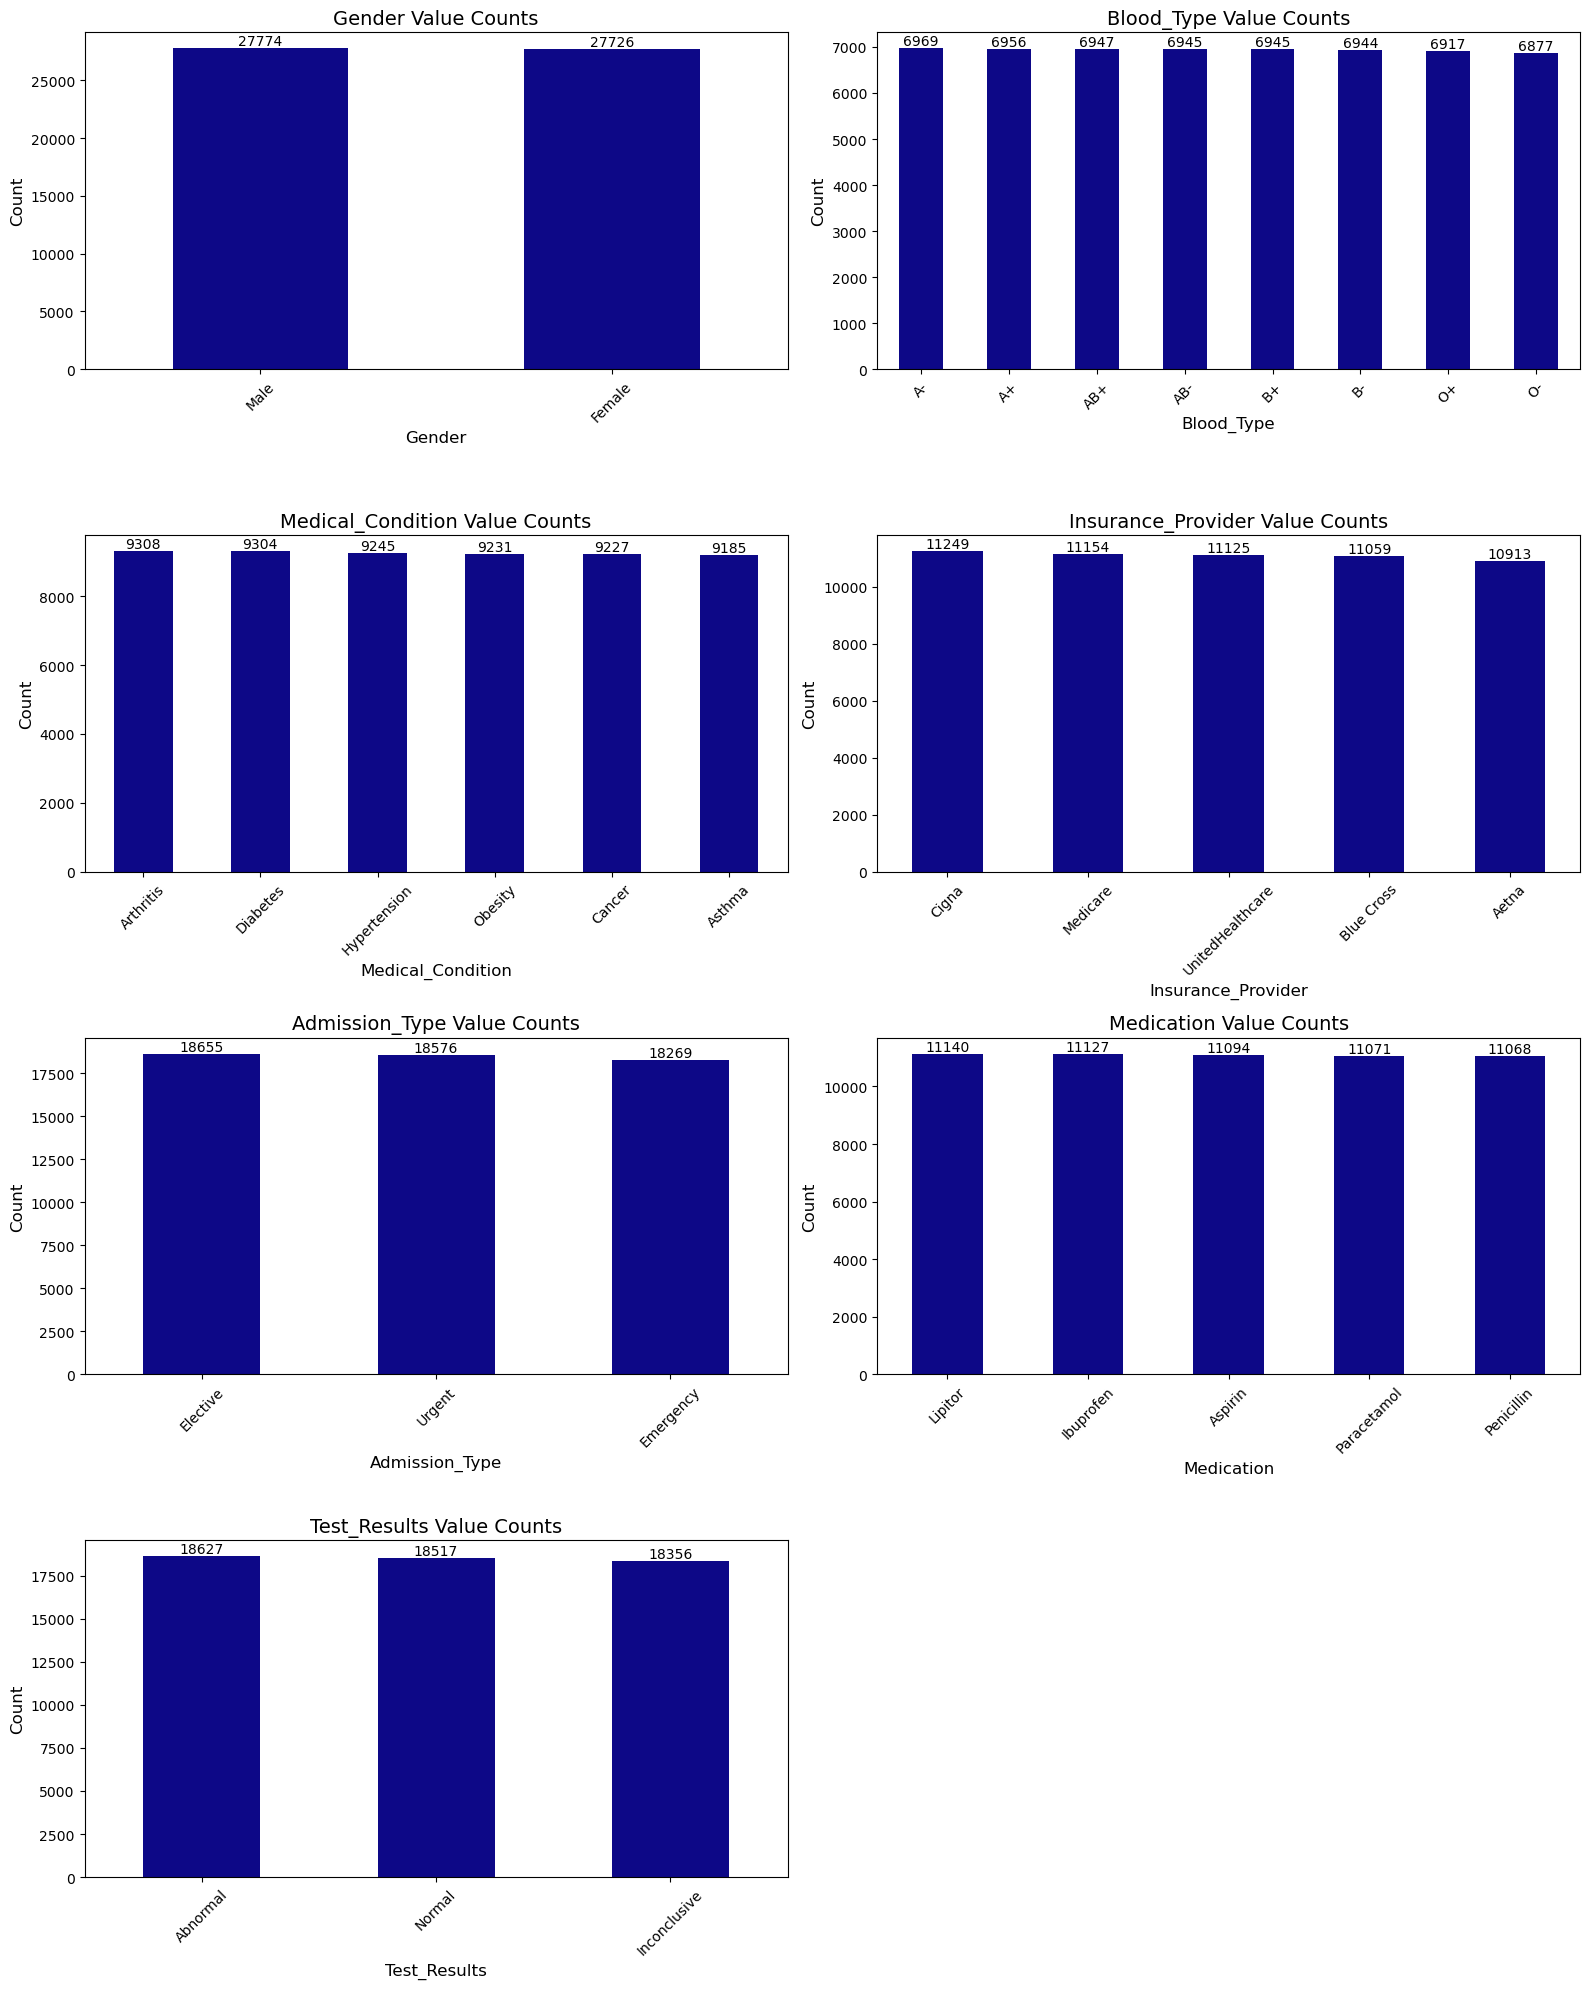

In [12]:
columns = ['Gender', 'Blood_Type', 'Medical_Condition', 'Insurance_Provider', 
           'Admission_Type', 'Medication', 'Test_Results']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20)) 

axes = axes.flatten()

for i, column in enumerate(columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i], colormap='plasma', title=column)
    
    axes[i].set_title(f"{column} Value Counts", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add labels to each bar
    axes[i].bar_label(axes[i].containers[0])

# Remove any empty subplots if the number of columns is less than the number of subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Monthly count of Admission

In [13]:
df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Days_Spent
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [14]:
df['Admission_Month'] = pd.to_datetime(df['Date_of_Admission'], format="%b").dt.month

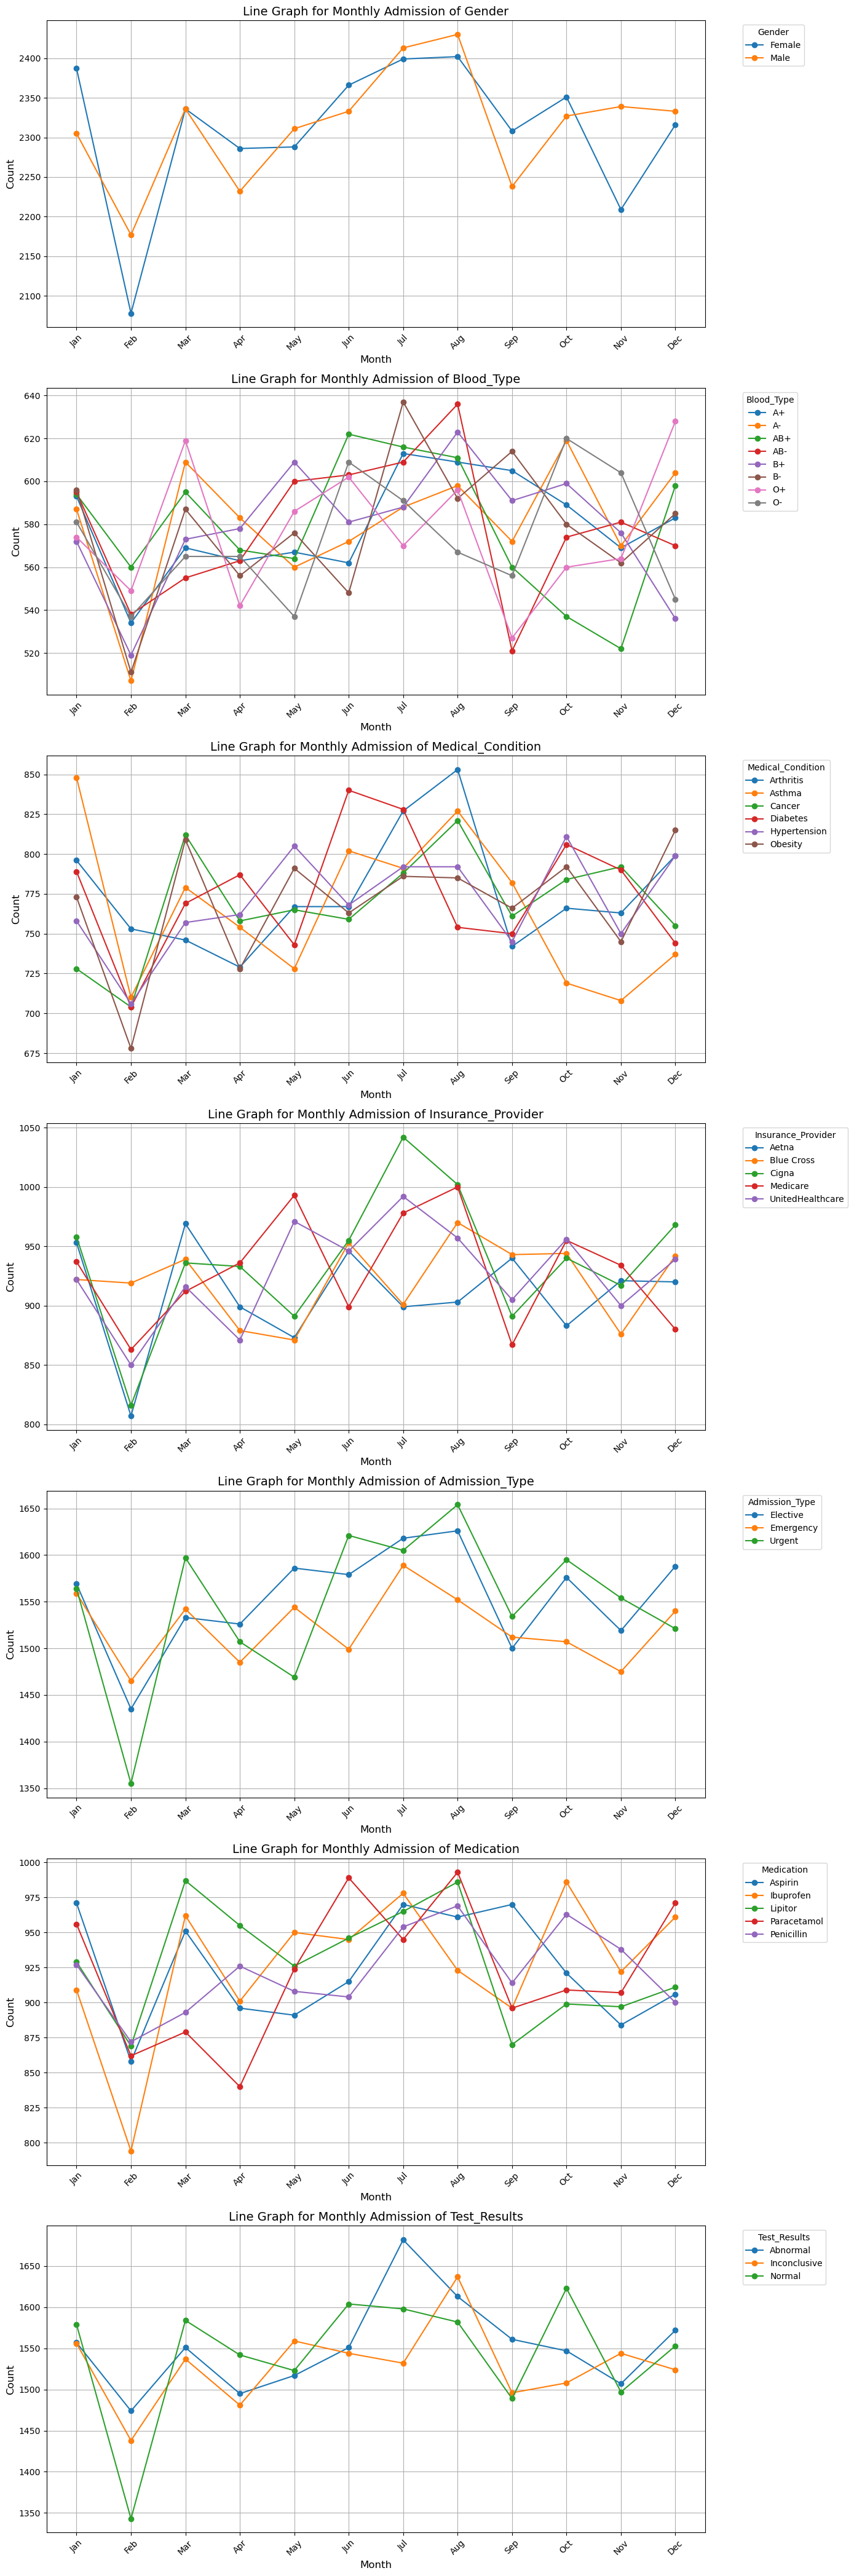

In [15]:
col = ['Gender', 'Blood_Type', 'Medical_Condition', 'Insurance_Provider', 
       'Admission_Type', 'Medication', 'Test_Results']

n_cols = 1
n_rows = (len(col)) 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 6 * n_rows))

axes = axes.flatten()

for i, column in enumerate(col):
    pivot_table = df.pivot_table(index="Admission_Month", columns=column, aggfunc="size", fill_value=0)
    
    pivot_table.index = pd.to_datetime(pivot_table.index, format="%m").strftime("%b")

    ax = axes[i]
    for c in pivot_table.columns:
        ax.plot(pivot_table.index, pivot_table[c], marker='o', label=f"{c}")

    ax.set_title(f"Line Graph for Monthly Admission of {column}", fontsize=14)
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xticks(range(len(pivot_table.index)))
    ax.set_xticklabels(pivot_table.index, rotation=45)  
    ax.grid(True)
    ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide any unused subplots (if there's an odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()


# Monthly count of Discharge

In [16]:
df.head(2)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Days_Spent,Admission_Month
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,1
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,8


In [17]:
df['Discharge_Month'] = pd.to_datetime(df['Discharge_Date'], format="%b").dt.month

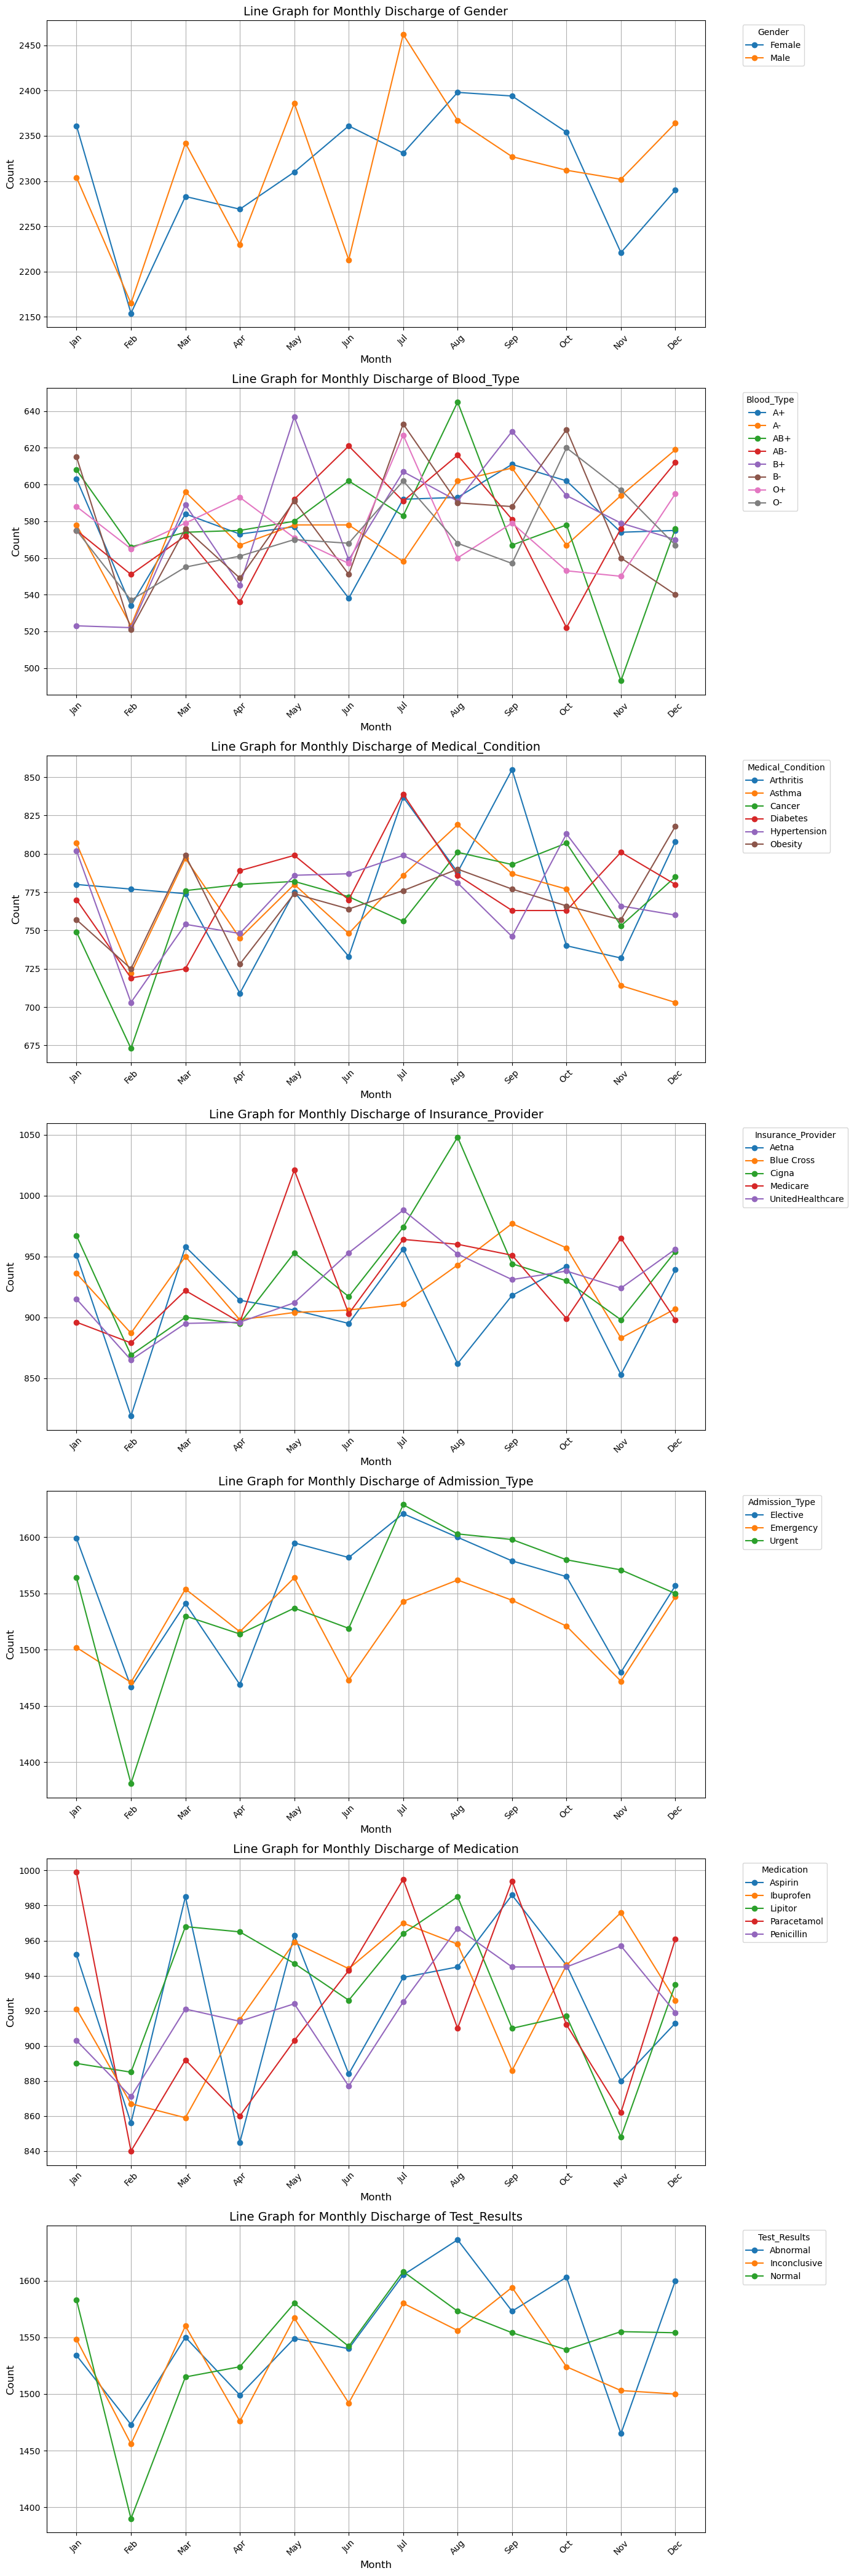

In [18]:
col = ['Gender', 'Blood_Type', 'Medical_Condition', 'Insurance_Provider', 
       'Admission_Type', 'Medication', 'Test_Results']

n_cols = 1
n_rows = (len(col)) 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 6 * n_rows))

axes = axes.flatten()

for i, column in enumerate(col):
    pivot_table = df.pivot_table(index="Discharge_Month", columns=column, aggfunc="size", fill_value=0)
    
    pivot_table.index = pd.to_datetime(pivot_table.index, format="%m").strftime("%b")

    ax = axes[i]
    for c in pivot_table.columns:
        ax.plot(pivot_table.index, pivot_table[c], marker='o', label=f"{c}")

    ax.set_title(f"Line Graph for Monthly Discharge of {column}", fontsize=14)
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xticks(range(len(pivot_table.index)))
    ax.set_xticklabels(pivot_table.index, rotation=45)  
    ax.grid(True)
    ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide any unused subplots (if there's an odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()


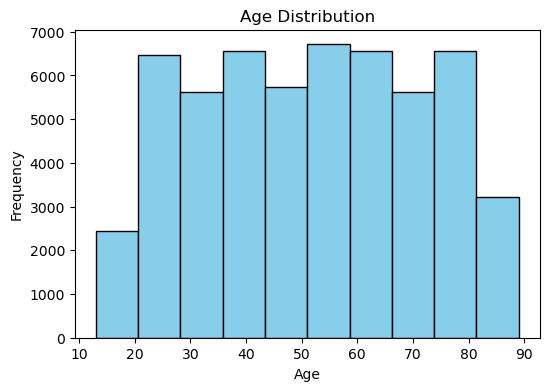

In [19]:
#Age Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution by Col

In [20]:
col = ['Blood_Type', 'Medical_Condition', 'Insurance_Provider', 
       'Admission_Type', 'Medication', 'Test_Results']
for column in col:
    pivot = df.pivot_table(index=column, columns="Gender", aggfunc="size")
    print(pivot)

Gender      Female  Male
Blood_Type              
A+            3564  3392
A-            3449  3520
AB+           3438  3509
AB-           3461  3484
B+            3377  3568
B-            3461  3483
O+            3464  3453
O-            3512  3365
Gender             Female  Male
Medical_Condition              
Arthritis            4686  4622
Asthma               4553  4632
Cancer               4602  4625
Diabetes             4651  4653
Hypertension         4612  4633
Obesity              4622  4609
Gender              Female  Male
Insurance_Provider              
Aetna                 5382  5531
Blue Cross            5565  5494
Cigna                 5652  5597
Medicare              5575  5579
UnitedHealthcare      5552  5573
Gender          Female  Male
Admission_Type              
Elective          9374  9281
Emergency         9244  9025
Urgent            9108  9468
Gender       Female  Male
Medication               
Aspirin        5622  5472
Ibuprofen      5593  5534
Lipitor       

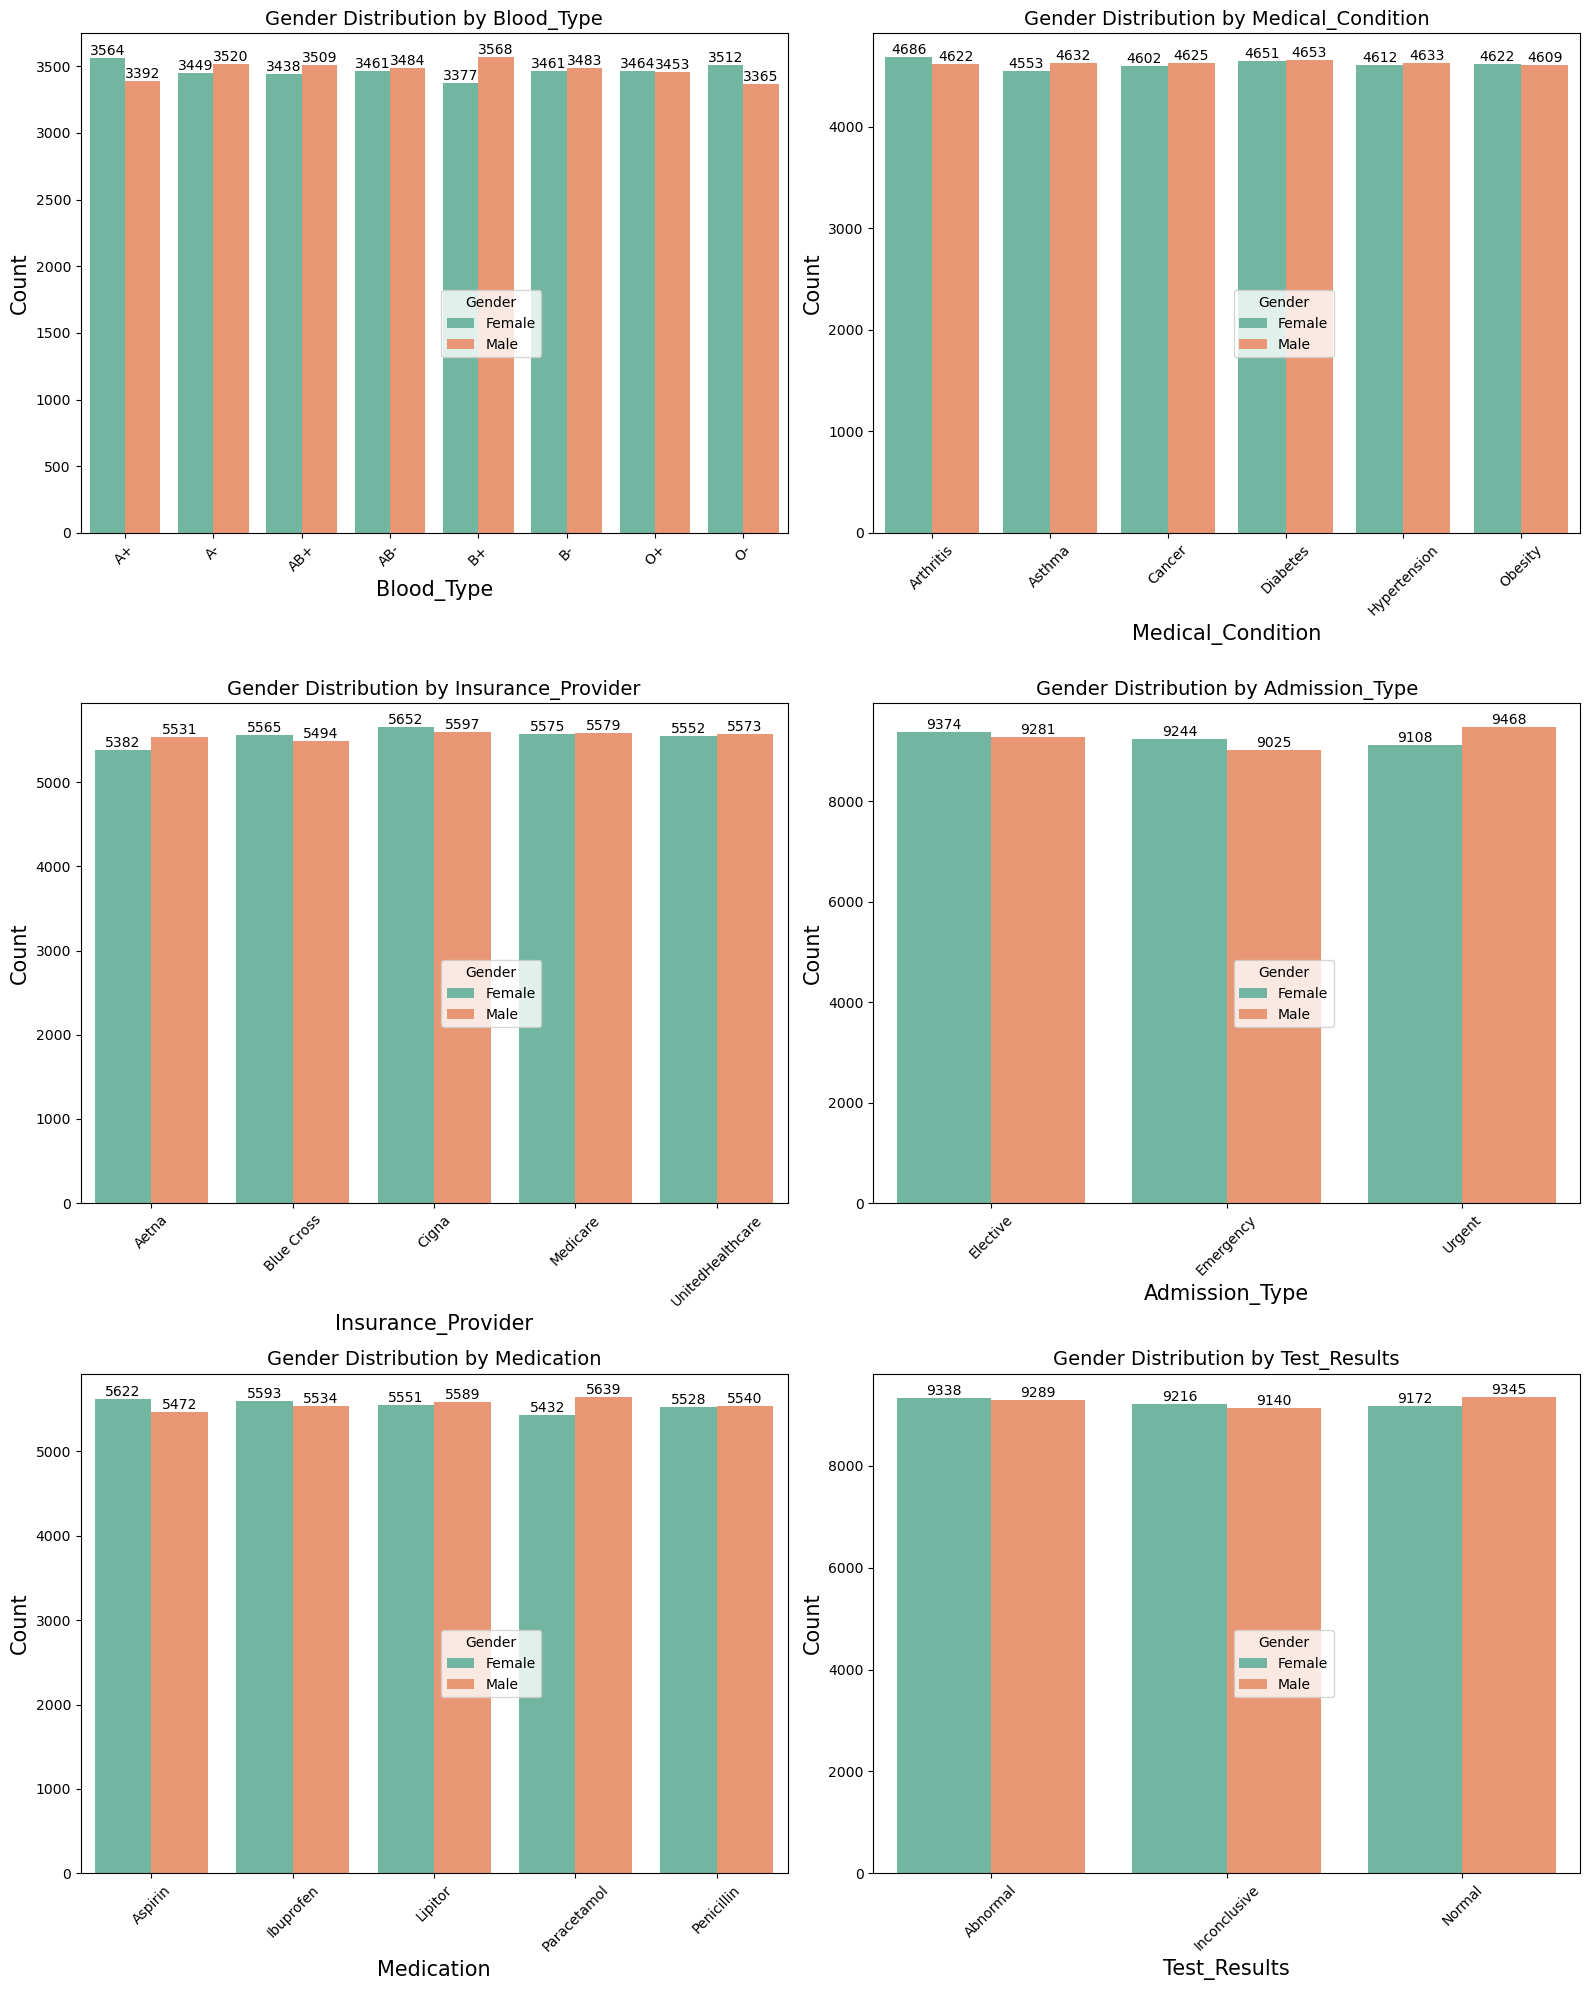

In [21]:
col = ['Blood_Type', 'Medical_Condition', 'Insurance_Provider', 
       'Admission_Type', 'Medication', 'Test_Results']

n_cols = 2
n_rows = (len(col) + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 20))
axes = axes.flatten()  

for i, column in enumerate(col):
    pivot = df.pivot_table(index=column, columns="Gender", aggfunc="size").reset_index()

    # Melting the pivot table for easy plotting in seaborn
    pivot_melted = pivot.melt(id_vars=column, var_name="Gender", value_name="Count")

    ax = axes[i]
    barplot = sns.barplot(x=column, y="Count", hue="Gender", data=pivot_melted, ax=ax, palette="Set2")

    # Adding labels to the bars
    for container in barplot.containers:
        barplot.bar_label(container)

    ax.set_title(f"Gender Distribution by {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=15)
    ax.set_ylabel("Count", fontsize=15)
    ax.tick_params(axis='x', rotation=45)
    
    ax.legend(title="Gender", bbox_to_anchor=(0.5, 0.5), loc='upper left')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()
